### Imports

In [2]:
import requests
import json
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import gensim
from gensim import corpora, models
import time



In [ ]:
file_path = 'C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/papers_content_v3.csv'
papers_df = pd.read_csv(file_path, encoding='utf-8')
papers_df

# LDA
Library used: https://tedboy.github.io/nlps/generated/generated/gensim.models.LdaMulticore.html

In [2]:
# Tokenize each cleaned text and create progress updates
print("Starting tokenization...")
start_time = time.time()
texts = []
for i, text in enumerate(papers_df['cleaned_content_text']):
    texts.append(text.split())
    if (i+1) % 100 == 0 or i+1 == len(papers_df['cleaned_content_text']):
        print(f"Tokenized {i+1}/{len(papers_df['cleaned_content_text'])} documents. [{time.time() - start_time:.2f} seconds elapsed]")

# Create a dictionary representation of the documents
print("Creating dictionary...")
dictionary = corpora.Dictionary(texts)

# Filter out extremes to remove noise and words that are too frequent or too rare
print("Filtering extremes...")
dictionary.filter_extremes(no_below=3, no_above=0.5, keep_n=100000)

# Convert dictionary to a bag of words corpus with progress updates
print("Creating BoW corpus...")
corpus = []
for i, text in enumerate(texts):
    corpus.append(dictionary.doc2bow(text))
    if (i+1) % 100 == 0 or i+1 == len(texts):
        print(f"Processed {i+1}/{len(texts)} documents into BoW. [{time.time() - start_time:.2f} seconds elapsed]")

# Train LDA model
print("Training LDA model...")
lda_model = models.LdaMulticore(corpus, id2word=dictionary, num_topics=200, passes=80, workers=2)
print("LDA model trained.")

#id2word is a mapping from word ids (integers) to words (strings). It is used to determine the vocabulary size, as well as for debugging and topic printing.


Starting tokenization...
Tokenized 100/1156 documents. [0.04 seconds elapsed]
Tokenized 200/1156 documents. [0.07 seconds elapsed]
Tokenized 300/1156 documents. [0.11 seconds elapsed]
Tokenized 400/1156 documents. [0.13 seconds elapsed]
Tokenized 500/1156 documents. [0.16 seconds elapsed]
Tokenized 600/1156 documents. [0.19 seconds elapsed]
Tokenized 700/1156 documents. [0.22 seconds elapsed]
Tokenized 800/1156 documents. [0.25 seconds elapsed]
Tokenized 900/1156 documents. [0.29 seconds elapsed]
Tokenized 1000/1156 documents. [0.35 seconds elapsed]
Tokenized 1100/1156 documents. [0.38 seconds elapsed]
Tokenized 1156/1156 documents. [0.39 seconds elapsed]
Creating dictionary...
Filtering extremes...
Creating BoW corpus...
Processed 100/1156 documents into BoW. [5.08 seconds elapsed]
Processed 200/1156 documents into BoW. [5.25 seconds elapsed]
Processed 300/1156 documents into BoW. [5.43 seconds elapsed]
Processed 400/1156 documents into BoW. [5.60 seconds elapsed]
Processed 500/1156 d

In [10]:
'''from gensim import corpora, models

papers_df = df
# Tokenize each cleaned text
texts = [text.split() for text in papers_df['cleaned_content_text']]
# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(texts)
# Filter out extremes to remove noise and words that are too frequent or too rare
dictionary.filter_extremes(no_below=3, no_above=0.5, keep_n=100000)
# Convert dictionary to a bag of words corpus
corpus = [dictionary.doc2bow(text) for text in texts]

#LdaMulticore = The constructor estimates Latent Dirichlet Allocation model parameters based
lda_model = models.LdaMulticore(corpus, id2word=dictionary, num_topics=20, passes=100, workers=2)
#id2word is a mapping from word ids (integers) to words (strings). It is used to determine the vocabulary size, as well as for debugging and topic printing.
'''

"from gensim import corpora, models\n\npapers_df = df\n# Tokenize each cleaned text\ntexts = [text.split() for text in papers_df['cleaned_content_text']]\n# Create a dictionary representation of the documents\ndictionary = corpora.Dictionary(texts)\n# Filter out extremes to remove noise and words that are too frequent or too rare\ndictionary.filter_extremes(no_below=3, no_above=0.5, keep_n=100000)\n# Convert dictionary to a bag of words corpus\ncorpus = [dictionary.doc2bow(text) for text in texts]\n\n#LdaMulticore = The constructor estimates Latent Dirichlet Allocation model parameters based\nlda_model = models.LdaMulticore(corpus, id2word=dictionary, num_topics=20, passes=100, workers=2)\n#id2word is a mapping from word ids (integers) to words (strings). It is used to determine the vocabulary size, as well as for debugging and topic printing.\n"

In [8]:
# Extract topics and their word distributions with the desired number of topics
topic_data = []
for topic_id, topic in lda_model.print_topics(num_topics=200, num_words=5):
    # The rest of your code remains the same
    word_probs = topic.split('+')
    words_probs_parsed = [wp.split('*') for wp in word_probs]
    words = [wp[1].strip() for wp in words_probs_parsed]  # Extract words
    probs = [float(wp[0].strip()) for wp in words_probs_parsed]  # Extract probabilities
    topic_data.append({
        'Topic ID': topic_id,
        'Words': words,
        'Probabilities': probs
    })

# Create a DataFrame
topics_df = pd.DataFrame(topic_data)

# Convert lists to string for CSV saving
topics_df['Words'] = topics_df['Words'].apply(lambda x: ', '.join(x))
topics_df['Probabilities'] = topics_df['Probabilities'].apply(lambda x: ', '.join(map(str, x)))
topics_df

,Topic ID,Words,Probabilities
0,0,"""psi"", ""breeding"", ""nest"", ""offspring"", ""egg""","0.035, 0.023, 0.017, 0.015, 0.012"
1,1,"""bee"", ""pollinator"", ""crop"", ""landscape"", ""wild""","0.049, 0.024, 0.023, 0.017, 0.017"
2,2,"""wasp"", ""pollinator"", ""ficus"", ""host"", ""sp""","0.041, 0.035, 0.031, 0.029, 0.016"
3,3,"""perturbation"", ""nutrient"", ""si"", ""sensitivity...","0.011, 0.01, 0.007, 0.006, 0.005"
4,4,"""library"", ""oa"", ""rule"", ""httpsonlinelibrarywi...","0.083, 0.042, 0.042, 0.041, 0.041"
...,...,...,...
195,195,"""biol"", ""sci"", ""evol"", ""proc"", ""nat""","0.076, 0.046, 0.035, 0.029, 0.022"
196,196,"""genetic"", ""differentiation"", ""locus"", ""mlgs"",...","0.013, 0.009, 0.009, 0.008, 0.008"
197,197,"""leaf"", ""niche"", ""litter"", ""http"", ""root""","0.0, 0.0, 0.0, 0.0, 0.0"
198,198,"""prey"", ""predator"", ""predation"", ""trophic"", ""web""","0.084, 0.082, 0.031, 0.015, 0.014"


In [9]:
topics_df.head(20)

,Topic ID,Words,Probabilities
0,0,"""psi"", ""breeding"", ""nest"", ""offspring"", ""egg""","0.035, 0.023, 0.017, 0.015, 0.012"
1,1,"""bee"", ""pollinator"", ""crop"", ""landscape"", ""wild""","0.049, 0.024, 0.023, 0.017, 0.017"
2,2,"""wasp"", ""pollinator"", ""ficus"", ""host"", ""sp""","0.041, 0.035, 0.031, 0.029, 0.016"
3,3,"""perturbation"", ""nutrient"", ""si"", ""sensitivity...","0.011, 0.01, 0.007, 0.006, 0.005"
4,4,"""library"", ""oa"", ""rule"", ""httpsonlinelibrarywi...","0.083, 0.042, 0.042, 0.041, 0.041"
5,5,"""heritage"", ""cultural"", ""service"", ""drought"", ...","0.056, 0.028, 0.011, 0.011, 0.01"
6,6,"""host"", ""parasite"", ""infection"", ""infected"", ""...","0.065, 0.052, 0.04, 0.022, 0.022"
7,7,"""bird"", ""native"", ""endemic"", ""bulbul"", ""climatic""","0.017, 0.014, 0.011, 0.011, 0.011"
8,8,"""forecast"", ""demographic"", ""horizon"", ""stochas...","0.028, 0.028, 0.014, 0.012, 0.012"
9,9,"""niche"", ""leaf"", ""landscape"", ""female"", ""dispe...","0.0, 0.0, 0.0, 0.0, 0.0"


In [10]:
topics_df.to_csv('C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/topics_LDA_v4.csv',sep='\t', encoding='utf-8', index=False)

#from google.colab import files
#files.download('Topics_LDA.csv')

In [11]:
# Step 1: Get Topic Distribution for Each Document (unchanged)
document_topics = [lda_model.get_document_topics(bow) for bow in corpus]

# Step 2: Store All Topics and Their Probabilities as Key-Value Pairs
topics_with_probabilities = []
for doc_topics in document_topics:
    # Store all topics and probabilities for the current document
    all_topics = {topic_id: round(prob * 100, 2) for topic_id, prob in doc_topics}
    topics_with_probabilities.append(all_topics)

# Step 3: Add the information to the DataFrame
papers_df['TopicsLDA'] = topics_with_probabilities

papers_df.to_csv('papers_BERTopic_LDA.csv',sep='\t', encoding='utf-8', index=False)

#from google.colab import files
#files.download('papers-topics.csv')

# Optional: To verify the new column, print the first few rows
papers_df

,title_s,journalTitle_s,authLastName_s,authFullName_s,abstract_s,fileMain_s,ePublicationDateY_i,Complete,Genders,unknownGenders,content_text,cleaned_content_text,contentLen,chunks,numChunks,Chunks_BERTopics,TopicsLDA
0,"[""Exploring farmers' agrobiodiversity manageme...",People and Nature,"['Mariel', 'Carrière', 'Penot', 'Danthu', 'Raf...","['Juliette Mariel', 'Stéphanie M. Carrière', '...","[""1. Interactions between farmers and agrobiod...",https://hal.inrae.fr/hal-03461601/document,NaN,True,"['female', 'female', 'male', 'male', 'unknown'...",33.333333,HAL Id: hal-03461601 https://hal.inrae.fr/hal-...,httpshalinraefrhal dec multidisciplinary open ...,48604,['httpshalinraefrhal dec multidisciplinary ope...,12,"[0, 124, -1, 124, 124, 124, 124, 124, 124, -1,...","{21: 2.29, 74: 1.52, 78: 1.76, 79: 1.18, 83: 2..."
1,['Interpreting the mammal deposits of Cloggs C...,People and Nature,"['Mcdowell', 'David', 'Mullett', 'Fresløv', 'D...","['Matthew Mcdowell', 'Bruno David', 'Russell M...","[""Palaeontological animal bone deposits are ra...",https://hal.science/hal-03829927/document,NaN,True,"['male', 'male', 'male', 'female', 'unknown', ...",8.333333,HAL Id: hal-03829927 https://hal.science/hal-0...,httpshalsciencehal mar multidisciplinary open ...,47810,['httpshalsciencehal mar multidisciplinary ope...,12,"[0, 4, 51, 135, 51, 51, 51, 51, 51, -1, 51, 51]","{4: 4.9, 15: 1.36, 21: 3.23, 23: 3.84, 41: 1.4..."
2,['An ecological theory of changing human popul...,People and Nature,"['Henderson', 'Loreau']","['Kirsten Henderson', 'Michel Loreau']",['The dependence of humans on nature has come ...,https://hal.science/hal-02350603/document,NaN,True,"['female', 'male']",0.000000,People and Nature. 2019;1:31–43. | 31 wileyonl...,people nature wileyonlinelibrarycomjournalpan ...,47819,['people nature wileyonlinelibrarycomjournalpa...,12,"[-1, 177, 177, 177, 177, 177, 177, 177, 177, 1...","{113: 4.74, 122: 2.72, 172: 66.77, 180: 21.67}"
3,"['Local knowledge, know‐how and knowledge mobi...",People and Nature,"['Congretel', 'Pinton']","['Mélanie Congretel', 'Florence F. Pinton']","[""More than 30 years after the 1988 Declaratio...",https://shs.hal.science/halshs-02937670/document,NaN,True,"['female', 'female']",0.000000,HAL Id: halshs-02937670 https://shs.hal.scienc...,halshs httpsshshalsciencehalshs multidisciplin...,68504,['halshs httpsshshalsciencehalshs multidiscipl...,16,"[0, 4, 4, 4, 4, 4, 4, -1, -1, 4, 4, 4, 4, -1, ...","{74: 1.19, 89: 3.77, 90: 1.3, 101: 2.16, 103: ..."
4,['From biodiversity to health: Quantifying the...,People and Nature,"['Ulrich', 'Batáry', 'Baudry', 'Beaumelle', 'B...","['Werner Ulrich', 'Péter Batáry', 'Julia Baudr...",['Ample evidence suggests positive effects of ...,https://cnam.hal.science/hal-04080723/document,NaN,True,"['male', 'male', 'female', 'female', 'male', '...",0.000000,People and Nature. 2023;5:69–83. | 69 wileyonl...,people nature wileyonlinelibrarycomjournalpan ...,58880,['people nature wileyonlinelibrarycomjournalpa...,14,"[-1, 45, -1, -1, -1, 53, 45, -1, -1, -1, -1, -...","{1: 3.44, 3: 1.16, 4: 9.25, 5: 2.42, 20: 1.5, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,['Unidirectional response to bidirectional sel...,Ecology and Evolution,"['Renneville', 'Millot', 'Agostini', 'Carmigna...","['Clémentine Renneville', 'Alexis Millot', 'Si...",['Anthropogenic perturbations such as harvesti...,https://hal.sorbonne-universite.fr/hal-0295053...,NaN,True,"['female', 'male', 'male', 'male', 'female', '...",0.000000,HAL Id: hal-02950535 https://hal.sorbonne-univ...,httpshalsorbonneuniversitefrhal sep multidisci...,55877,['httpshalsorbonneuniversitefrhal sep multidis...,14,"[0, 32, 32, 32, -1, -1, -1, -1, -1, -1, -1, 32...","{38: 7.41, 42: 1.55, 51: 1.56, 56: 23.42, 69: ..."
1152,"['Think globally, measure locally: The MIREN s...",Ecology and Evolution,"['Haider', 'Lembrechts', 'Mcdougall', 'Pauchar...","['Sylvia Haider', 'Jonas J. Lembrechts', 'Keit...",['Climate change and othe

In [12]:
papers_df.to_csv('C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/papers_BERTopic_LDA_v4.csv',sep='\t', encoding='utf-8', index=False)

In [8]:

import pandas as pd

def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list  # LdaMulticore doesn't have the `per_word_topics` attribute
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Extract the dominant topic, its percentage contribution, and keywords
        topic_num, prop_topic = row[0]  # dominant topic
        wp = ldamodel.show_topic(topic_num)
        topic_keywords = ", ".join([word for word, prop in wp])
        sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)

    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1, ignore_index=True)
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords', 'Text']
    return sent_topics_df

# Prepare data_ready from papers_df['cleaned_content_text']
data_ready = papers_df['cleaned_content_text'].tolist()

# Format LDA topic sentences
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Display the DataFrame
df_topic_sents_keywords


C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppD

C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppD

C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppD

C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppD

C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppD

C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppD

C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppD

C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppD

C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppD

C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppD

C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppD

C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppD

C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppD

C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppD

C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppD

C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppD

C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppD

C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppD

C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppD

C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppD

C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppD

C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppD

C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppD

C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppD

C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppD

C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppD

C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppD

C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppD

C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppD

C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppD

C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppD

C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppD

C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppD

C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppD

C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppD

C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppD

C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppD

C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppD

C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppD

C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_16204\2188995029.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\maria\AppD

,Dominant_Topic,Perc_Contribution,Topic_Keywords,Text
0,75,0.8043,"farmer, subsidy, agroforestry, flow, coffee, s...",httpshalinraefrhal dec multidisciplinary open ...
1,180,0.7819,"seed, novelty, pollen, focal, segetum, yield, ...",httpshalsciencehal mar multidisciplinary open ...
2,135,0.2899,"service, people, policy, pesticide, social, is...",people nature wileyonlinelibrarycomjournalpan ...
3,135,0.3929,"service, people, policy, pesticide, social, is...",halshs httpsshshalsciencehalshs multidisciplin...
4,186,0.4526,"richness, productivity, functioning, assembly,...",people nature wileyonlinelibrarycomjournalpan ...
...,...,...,...,...
1151,53,0.3142,"generation, fish, frequency, copepod, h, body,...",httpshalsorbonneuniversitefrhal sep multidisci...
1152,17,0.4984,"vegetation, plot, grassland, copy, confidentia...",httpsupicardiehalsciencehal oct multidisciplin...
1153,198,0.8461,"atoll, island, crop, pearl, biomass, richness,...",httpshalinraefrhal multidisciplinary open acce...
1154,45,0.5989,"bat, solar, foraging, wind, turbine, flight, l...",httpshalsciencehal jul multidisciplinary open ...


In [15]:
#topics_df.to_csv('dominant_LDA-topics.csv', index=False)

In [ ]:
#!pip install --upgrade pandas pyLDAvis gensim

In [ ]:
'''import pyLDAvis
import pyLDAvis.gensim_models as gensimvis  # Adjusted import for newer versions
pyLDAvis.enable_notebook()

# Ensure you have the dictionary and corpus as prepared for the LDA model
# lda_model = The LdaMulticore model you trained
# corpus = The document-term matrix
# dictionary = The dictionary mapping of id -> word

vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)
'''

In [16]:
# Format
'''df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
print(len(df_dominant_topic))
df_dominant_topic.head(10)'''

1129


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,15,0.5154,"native, invasion, invasive, alien, people, ser...",httpshalinraefrhal dec multidisciplinary open ...
1,1,18,0.5068,"niche, network, dispersal, extinction, competi...",httpshalsciencehal mar multidisciplinary open ...
2,2,14,0.7273,"gg, wind, movement, warming, bat, vegetation, ...",people nature wileyonlinelibrarycomjournalpan ...
3,3,15,0.6862,"native, invasion, invasive, alien, people, ser...",halshs httpsshshalsciencehalshs multidisciplin...
4,4,15,0.3929,"native, invasion, invasive, alien, people, ser...",people nature wileyonlinelibrarycomjournalpan ...
5,5,15,0.7697,"native, invasion, invasive, alien, people, ser...",httpshalinraefrhal apr multidisciplinary open ...
6,6,15,0.6721,"native, invasion, invasive, alien, people, ser...",httpshalsciencehal jan multidisciplinary open ...
7,7,15,0.9998,"native, invasion, invasive, alien, people, ser...",httpshalsciencehal jan multidisciplinary open ...
8,8,15,0.6552,"native, invasion, invasive, alien, people, ser...",httpshalinraefrhal mar multidisciplinary open ...
9,9,15,0.9970,"native, invasion, invasive, alien, people, ser...",people nature wileyonlinelibrarycomjournalpan ...



Visualizaciones utiles: https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

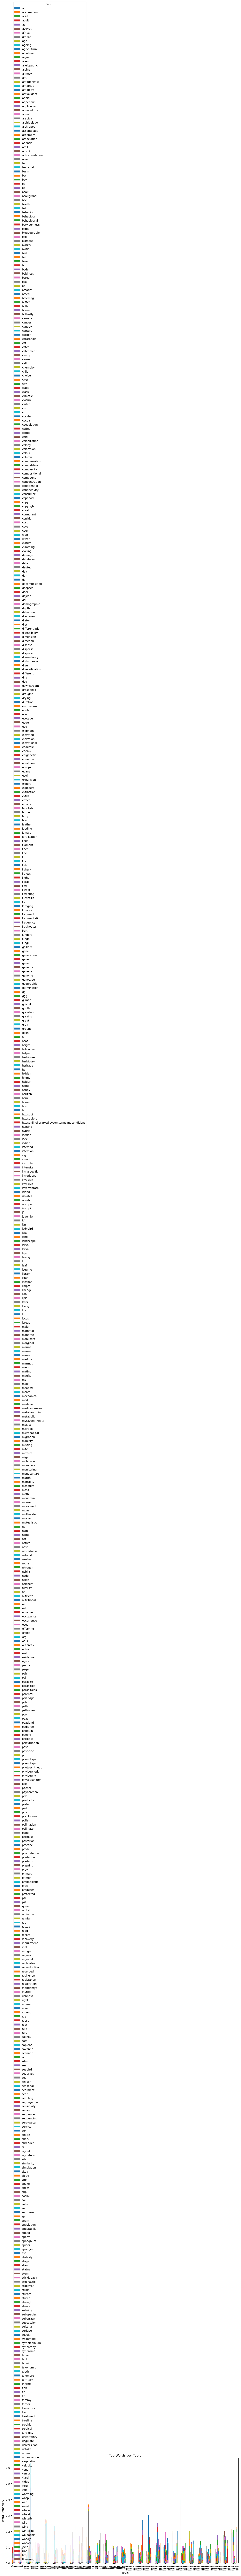

In [16]:
#TOPIC-WORD DISTRIBUTION
#Visualize results
import matplotlib.pyplot as plt
import pandas as pd

top_words_per_topic = []
for t in range(lda_model.num_topics):
    top_words_per_topic.extend([(t,) + x for x in lda_model.show_topic(t, topn = 5)])

pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P']).pivot_table(index='Topic', columns='Word', values='P').plot(kind='bar', stacked=True, figsize=(15, 7))
plt.ylabel('Word Probability')
plt.title('Top Words per Topic')
plt.show()


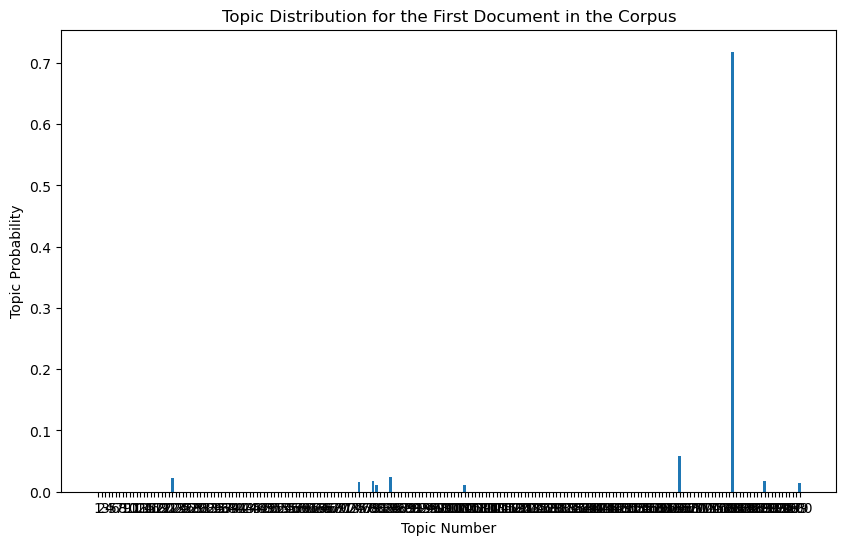

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.01502037],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.06635511],
       [0.        , 0.        , 0.        , ..., 0.        , 0.94373351,
        0.        ]])

In [17]:
#DOCUMENT-TOPIC DISTRIBUTION
import numpy as np

# Initialize a matrix filled with zeros
doc_topic_dist_uniform = np.zeros((len(corpus), lda_model.num_topics))

# Populate the matrix with topic probabilities
for i, doc in enumerate(lda_model[corpus]):
    for topic, prob in doc:
        doc_topic_dist_uniform[i, topic] = prob

# Assuming doc_topic_dist_uniform is correct and contains the topic distributions
plt.figure(figsize=(10, 6))
# Adding 1 to have topics starting from 1 instead of 0 for readability
topics = np.arange(1, lda_model.num_topics + 1)
plt.bar(topics, doc_topic_dist_uniform[0])

plt.xticks(topics)  # Set x-ticks to be the topic numbers
plt.xlabel('Topic Number')
plt.ylabel('Topic Probability')
plt.title('Topic Distribution for the First Document in the Corpus')
plt.show()

doc_topic_dist_uniform

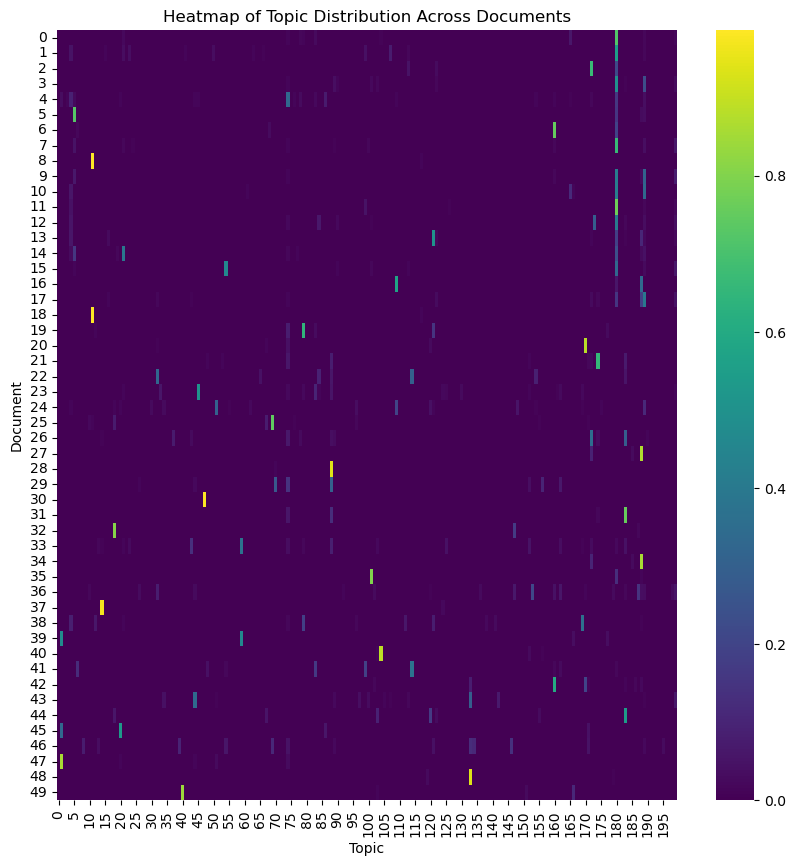

In [18]:
import seaborn as sns

# Creating a DataFrame for the first N documents
doc_topic_dist_uniform = pd.DataFrame(doc_topic_dist_uniform[:50])

# Plotting the heatmap
plt.figure(figsize=(10,10))
sns.heatmap(doc_topic_dist_uniform, cmap='viridis')
plt.xlabel('Topic')
plt.ylabel('Document')
plt.title('Heatmap of Topic Distribution Across Documents')
plt.show()


In [19]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data_ready):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

NameError: name 'data_ready' is not defined

In [ ]:
#most representative sentence for each topic# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet,
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)],
                                            axis=0)

# Reset Index
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

# Visualization experimenting

In [21]:
!pip install pyLDAvis gensim matplotlib pandas


  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 2.6/2.6 MB 6.6 MB/s eta 0:00:00
   ---------------------------------------- 11.6/11.6 MB 8.8 MB/s eta 0:00:00
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3


  You can safely remove it manually.


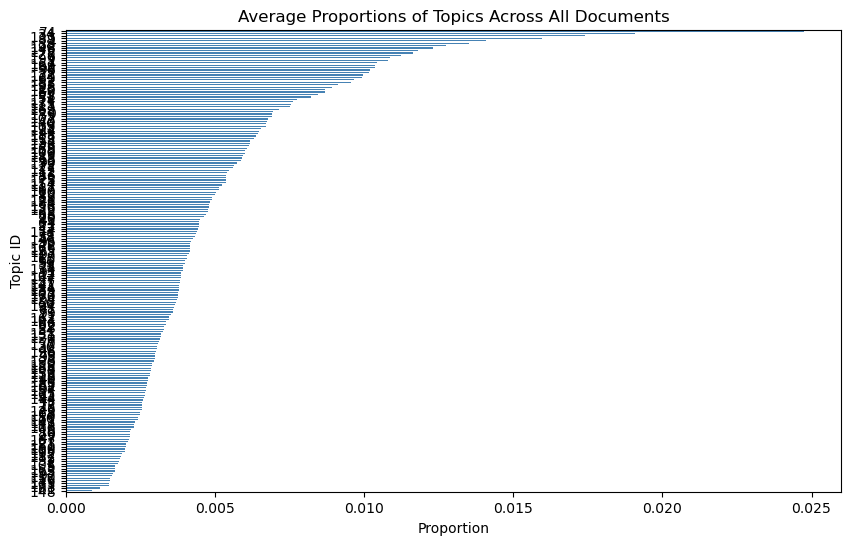

In [23]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `lda_model` and `corpus` are already created from the previous steps
# and `dictionary` is the Gensim dictionary object for the LDA model

# Prepare the visualization data for pyLDAvis without parallel processing
vis_data = gensimvis.prepare(lda_model, corpus, dictionary, n_jobs=1)

# Visualize the topics using pyLDAvis
pyLDAvis.display(vis_data)

# Optionally, save the visualization to an HTML file
pyLDAvis.save_html(vis_data, 'lda_visualization.html')

# Create a bar chart for the proportion of topics across all documents
doc_topic_dist = [lda_model.get_document_topics(item) for item in corpus]
topic_proportions = pd.DataFrame([
    {topic_id: prop for topic_id, prop in doc} for doc in doc_topic_dist
]).fillna(0).mean()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
topic_proportions.sort_values().plot(kind='barh', ax=ax, color='steelblue')
ax.set_title('Average Proportions of Topics Across All Documents')
ax.set_xlabel('Proportion')
ax.set_ylabel('Topic ID')
plt.show()


#  LDA Improved

v5 - Using cleaned_content_text


v6 - Using cleaned_content_text_noRefs

In [3]:
file_path = 'C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/papers_content_v3.csv'
papers_df = pd.read_csv(file_path, encoding='utf-8')
papers_df

,fileMain_s,content_text,cleaned_content_text,content_text_noRefs,refs_percentage,chunks,numChunks,cleaned_content_text_noRefs
0,https://hal.inrae.fr/hal-03222436/document,HAL Id: hal-03222436 https://hal.inrae.fr/hal-...,httpshalinraefrhal jul multidisciplinary open ...,HAL Id: hal-03222436 https://hal.inrae.fr/hal-...,58.418383,['HAL Id : hal-03222436 https : //hal.inrae.fr...,26,jul multidisciplinary open access archive depo...
1,https://hal.science/hal-00722758/document,HAL Id: hal-00722758 https://hal.science/hal-0...,httpshalsciencehal jan multidisciplinary open ...,HAL Id: hal-00722758 https://hal.science/hal-0...,57.506192,['HAL Id : hal-00722758 https : //hal.science/...,31,jan multidisciplinary open access archive depo...
2,https://hal.science/hal-02998161/document,Ecology Letters Reduced phenotypic plasticity ...,ecology letter reduced phenotypic plasticity e...,Ecology Letters Reduced phenotypic plasticity ...,56.844071,['Ecology Letters Reduced phenotypic plasticit...,2,ecology letter reduced phenotypic plasticity e...
3,https://hal.science/hal-03321017/document,HAL Id: hal-03321017 https://hal.science/hal-0...,httpshalsciencehal aug multidisciplinary open ...,HAL Id: hal-03321017 https://hal.science/hal-0...,56.638338,['HAL Id : hal-03321017 https : //hal.science/...,15,aug multidisciplinary open access archive depo...
4,https://hal.science/hal-02551964/document,"Author Posting. © D. Sol, C. Trisos, C. Múrri...",author posting sol trisos múrria jeliazkov gon...,"Author Posting. © D. Sol, C. Trisos, C. Múrri...",54.070648,"[""Author Posting . © D. Sol , C. Trisos , C. M...",14,author posting sol trisos múrria jeliazkov gon...
...,...,...,...,...,...,...,...,...
1150,https://hal.science/hal-01335885/document,HAL Id: hal-01335885 https://hal.science/hal-0...,httpshalsciencehal jun multidisciplinary open ...,HAL Id: hal-01335885 https://hal.science/hal-0...,0.000000,['HAL Id : hal-01335885 https : //hal.science/...,15,jun multidisciplinary open access archive depo...
1151,https://hal.science/hal-03813747/document,HAL Id: hal-03813747 https://hal.science/hal-0...,httpshalsciencehal oct multidisciplinary open ...,HAL Id: hal-03813747 https://hal.science/hal-0...,0.000000,['HAL Id : hal-03813747 https : //hal.science/...,5,oct multidisciplinary open access archive depo...
1152,https://hal.science/hal-03203941/document,Global data set for nitrogen and carbon stable...,data set nitrogen carbon stable isotope tuna n...,Global data set for nitrogen and carbon stable...,0.000000,['Global data set for nitrogen and carbon stab...,2,data set nitrogen carbon stable isotope tuna n...
1153,https://hal.science/hal-04164752/document,HAL Id: hal-04164752 https://hal.science/hal-0...,httpshalsciencehal jul multidisciplinary open ...,HAL Id: hal-04164752 https://hal.science/hal-0...,0.000000,['HAL Id : hal-04164752 https : //hal.science/...,7,jul multidisciplinary open access archive depo...


In [18]:
# Tokenize each cleaned text and create progress updates
print("Starting tokenization...")
start_time = time.time()
texts = []
for i, text in enumerate(papers_df['cleaned_content_text_noRefs']):
    texts.append(text.split())
    if (i+1) % 100 == 0 or i+1 == len(papers_df['cleaned_content_text_noRefs']):
        print(f"Tokenized {i+1}/{len(papers_df['cleaned_content_text_noRefs'])} documents. [{time.time() - start_time:.2f} seconds elapsed]")

# Create a dictionary representation of the documents
print("Creating dictionary...")
dictionary = corpora.Dictionary(texts)

# Filter out extremes to remove noise and words that are too frequent or too rare
print("Filtering extremes...")
dictionary.filter_extremes(no_below=3, no_above=0.5, keep_n=100000)

# Convert dictionary to a bag of words corpus with progress updates
print("Creating BoW corpus...")
corpus = []
for i, text in enumerate(texts):
    corpus.append(dictionary.doc2bow(text))
    if (i+1) % 100 == 0 or i+1 == len(texts):
        print(f"Processed {i+1}/{len(texts)} documents into BoW. [{time.time() - start_time:.2f} seconds elapsed]")

# Train LDA model
print("Training LDA model...")
lda_model = models.LdaMulticore(corpus, id2word=dictionary, num_topics=70, passes=100, workers=2)
print("LDA model trained.")

#id2word is a mapping from word ids (integers) to words (strings). It is used to determine the vocabulary size, as well as for debugging and topic printing.


Starting tokenization...
Tokenized 100/1155 documents. [0.25 seconds elapsed]
Tokenized 200/1155 documents. [0.28 seconds elapsed]
Tokenized 300/1155 documents. [0.33 seconds elapsed]
Tokenized 400/1155 documents. [0.38 seconds elapsed]
Tokenized 500/1155 documents. [0.42 seconds elapsed]
Tokenized 600/1155 documents. [0.46 seconds elapsed]
Tokenized 700/1155 documents. [0.50 seconds elapsed]
Tokenized 800/1155 documents. [0.61 seconds elapsed]
Tokenized 900/1155 documents. [0.66 seconds elapsed]
Tokenized 1000/1155 documents. [0.69 seconds elapsed]
Tokenized 1100/1155 documents. [0.72 seconds elapsed]
Tokenized 1155/1155 documents. [0.75 seconds elapsed]
Creating dictionary...
Filtering extremes...
Creating BoW corpus...
Processed 100/1155 documents into BoW. [5.94 seconds elapsed]
Processed 200/1155 documents into BoW. [6.14 seconds elapsed]
Processed 300/1155 documents into BoW. [6.32 seconds elapsed]
Processed 400/1155 documents into BoW. [6.54 seconds elapsed]
Processed 500/1155 d

In [19]:
# Extract topics and their word distributions with the desired number of topics
topic_data = []
for topic_id, topic in lda_model.print_topics(num_topics=200, num_words=10):
    # The rest of your code remains the same
    word_probs = topic.split('+')
    words_probs_parsed = [wp.split('*') for wp in word_probs]
    words = [wp[1].strip() for wp in words_probs_parsed]  # Extract words
    probs = [float(wp[0].strip()) for wp in words_probs_parsed]  # Extract probabilities
    topic_data.append({
        'Topic ID': topic_id,
        'Words': words,
        'Probabilities': probs
    })

# Create a DataFrame
topics_df = pd.DataFrame(topic_data)

# Convert lists to string for CSV saving
topics_df['Words'] = topics_df['Words'].apply(lambda x: ', '.join(x))
topics_df['Probabilities'] = topics_df['Probabilities'].apply(lambda x: ', '.join(map(str, x)))
topics_df

,Topic ID,Words,Probabilities
0,0,"""niche"", ""climatic"", ""urban"", ""shift"", ""precipitation"", ""adaptation"", ""adaptive"", ""occurrence"", ...","0.027, 0.018, 0.015, 0.008, 0.008, 0.008, 0.007, 0.006, 0.005, 0.005"
1,1,"""fish"", ""bat"", ""reef"", ""roost"", ""body"", ""content"", ""feeding"", ""cat"", ""behavior"", ""feces""","0.036, 0.01, 0.007, 0.007, 0.007, 0.006, 0.006, 0.005, 0.005, 0.005"
2,2,"""bee"", ""pollinator"", ""pollen"", ""floral"", ""flower"", ""wild"", ""honey"", ""urban"", ""flowering"", ""nectar""","0.041, 0.019, 0.015, 0.015, 0.013, 0.01, 0.009, 0.009, 0.009, 0.008"
3,3,"""lion"", ""social"", ""subgroup"", ""forecast"", ""encounter"", ""prey"", ""vegetation"", ""season"", ""elephant...","0.027, 0.025, 0.016, 0.016, 0.015, 0.011, 0.011, 0.01, 0.009, 0.009"
4,4,"""bird"", ""breeding"", ""winter"", ""migration"", ""season"", ""helper"", ""hunting"", ""survival"", ""colony"", ...","0.018, 0.015, 0.011, 0.01, 0.009, 0.008, 0.008, 0.007, 0.007, 0.007"
...,...,...,...
65,65,"""fire"", ""plot"", ""depth"", ""peat"", ""morph"", ""burned"", ""exposure"", ""sphagnum"", ""caterpillar"", ""peat...","0.031, 0.011, 0.009, 0.009, 0.008, 0.008, 0.007, 0.007, 0.007, 0.006"
66,66,"""tree"", ""forest"", ""leaf"", ""plot"", ""stand"", ""oak"", ""canopy"", ""insect"", ""herbivore"", ""height""","0.061, 0.042, 0.015, 0.014, 0.01, 0.007, 0.007, 0.007, 0.006, 0.006"
67,67,"""competition"", ""landscape"", ""dispersal"", ""patch"", ""niche"", ""simulation"", ""metacommunity"", ""tempo...","0.011, 0.01, 0.008, 0.008, 0.007, 0.006, 0.006, 0.006, 0.006, 0.005"
68,68,"""online"", ""library"", ""rule"", ""downloaded"", ""governed"", ""applicable"", ""writing"", ""supporting"", ""c...","0.055, 0.055, 0.028, 0.028, 0.027, 0.027, 0.015, 0.015, 0.013, 0.012"


In [20]:
topics_df.to_csv('C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/topics_LDA_v6.csv',sep='\t', encoding='utf-8', index=False)

In [21]:
lda_model.save('C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/lda_model_v6.model')

In [29]:
# Step 1: Get Topic Distribution for Each Document (unchanged)
document_topics = [lda_model.get_document_topics(bow) for bow in corpus]

# Step 2: Store All Topics and Their Probabilities as Key-Value Pairs
topics_with_probabilities = []
for doc_topics in document_topics:
    # Store all topics and probabilities for the current document
    all_topics = {topic_id: int(round(prob * 100, 0)) for topic_id, prob in doc_topics}
    topics_with_probabilities.append(all_topics)

# Step 3: Add the information to the DataFrame
papers_df['TopicsLDA'] = topics_with_probabilities

papers_df.to_csv('C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/papers_LDA_v6.csv', encoding='utf-8', index=False)

#from google.colab import files
#files.download('papers-topics.csv')

# Optional: To verify the new column, print the first few rows
papers_df

,fileMain_s,content_text,cleaned_content_text,content_text_noRefs,refs_percentage,chunks,numChunks,cleaned_content_text_noRefs,TopicsLDA
0,https://hal.inrae.fr/hal-03222436/document,HAL Id: hal-03222436 https://hal.inrae.fr/hal-03222436\nSubmitted on 29 Jul 2021\nHAL is a multi...,httpshalinraefrhal jul multidisciplinary open access archive deposit dissemination document whet...,HAL Id: hal-03222436 https://hal.inrae.fr/hal-03222436\nSubmitted on 29 Jul 2021\nHAL is a multi...,58.418383,['HAL Id : hal-03222436 https : //hal.inrae.fr/hal-03222436 Submitted on 29 Jul 2021 HAL is a mu...,26,jul multidisciplinary open access archive deposit dissemination document whether document come t...,"{0: 4, 12: 3, 18: 6, 46: 2, 48: 1, 53: 2, 64: 5, 66: 54, 67: 20}"
1,https://hal.science/hal-00722758/document,HAL Id: hal-00722758 https://hal.science/hal-00722758\nSubmitted on 6 Jan 2022\nHAL is a multi-d...,httpshalsciencehal jan multidisciplinary open access archive deposit dissemination document whet...,HAL Id: hal-00722758 https://hal.science/hal-00722758\nSubmitted on 6 Jan 2022\nHAL is a multi-d...,57.506192,['HAL Id : hal-00722758 https : //hal.science/hal-00722758 Submitted on 6 Jan 2022 HAL is a mult...,31,jan multidisciplinary open access archive deposit dissemination document whether document come t...,"{1: 1, 16: 39, 17: 22, 23: 12, 29: 3, 36: 4, 51: 6, 64: 2, 67: 10}"
2,https://hal.science/hal-02998161/document,Ecology Letters Reduced phenotypic plasticity evolves in less predictable environments Christell...,ecology letter reduced phenotypic plasticity evolves le predictable environment christelle leung...,Ecology Letters Reduced phenotypic plasticity evolves in less predictable environments Christell...,56.844071,['Ecology Letters Reduced phenotypic plasticity evolves in less predictable environments Christe...,2,ecology letter reduced phenotypic plasticity evolves le predictable environment christelle leung...,"{5: 21, 6: 33, 17: 1, 26: 14, 37: 18, 44: 9, 61: 3}"
3,https://hal.science/hal-03321017/document,HAL Id: hal-03321017 https://hal.science/hal-03321017\nSubmitted on 16 Aug 2021\nHAL is a multi-...,httpshalsciencehal aug multidisciplinary open access archive deposit dissemination document whet...,HAL Id: hal-03321017 https://hal.science/hal-03321017\nSubmitted on 16 Aug 2021\nHAL is a multi-...,56.638338,['HAL Id : hal-03321017 https : //hal.science/hal-03321017 Submitted on 16 Aug 2021 HAL is a mul...,15,aug multidisciplinary open access archive deposit dissemination document whether document come t...,"{4: 5, 18: 20, 21: 8, 29: 61, 46: 5}"
4,https://hal.science/hal-02551964/document,"Author Posting. © D. Sol, C. Trisos, C. Múrria, A. Jeliazkov, C. González-Lagos, A.L. Pigot, C....",author posting sol trisos múrria jeliazkov gonzálezlagos pigot ricotta cm swan ja tobias pavoine...,"Author Posting. © D. Sol, C. Trisos, C. Múrria, A. Jeliazkov, C. González-Lagos, A.L. Pigot, C....",54.070648,"[""Author Posting . © D. Sol , C. Trisos , C. Múrria , A. Jeliazkov , C. González-Lagos , A.L . P...",14,author posting sol trisos múrria jeliazkov gonzálezlagos pigot ricotta swan tobias pavoine autho...,"{0: 7, 2: 3, 12: 2, 17: 44, 18: 2, 21: 21, 34: 2, 40: 4, 43: 2, 53: 2, 64: 3, 67: 2}"
...,...,...,...,...,...,...,...,...,...
1150,https://hal.science/hal-01335885/document,HAL Id: hal-01335885 https://hal.science/hal-01335885\nSubmitted on 22 Jun 2016\nHAL is a multi-...,httpshalsciencehal jun multidisciplinary open access archive deposit dissemination document whet...,HAL Id: hal-01335885 https://hal.science/hal-01335885\nSubmitted on 22 Jun 2016\nHAL is a multi-...,0.000000,['HAL Id : hal-01335885 https : //hal.science/hal-01335885 Submitted on 22 Jun 2016 HAL is a mul...,15,jun multidisciplinary open access archive deposit dissemination document whether document come t...,"{6: 2, 37: 1, 41: 6, 45: 9, 47: 42, 48: 7, 57: 3, 60: 26, 64: 1}"
1151,https://hal.science/hal-03813747/document,HAL Id: hal-03813747 https://hal.science/hal

In [10]:

import pandas as pd

def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list  # LdaMulticore doesn't have the `per_word_topics` attribute
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Extract the dominant topic, its percentage contribution, and keywords
        topic_num, prop_topic = row[0]  # dominant topic
        wp = ldamodel.show_topic(topic_num)
        topic_keywords = ", ".join([word for word, prop in wp])
        sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)

    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1, ignore_index=True)
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords', 'Text']
    return sent_topics_df

# Prepare data_ready from papers_df['cleaned_content_text']
data_ready = papers_df['cleaned_content_text'].tolist()

# Format LDA topic sentences
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Display the DataFrame
df_topic_sents_keywords


AttributeError: 'DataFrame' object has no attribute 'append'

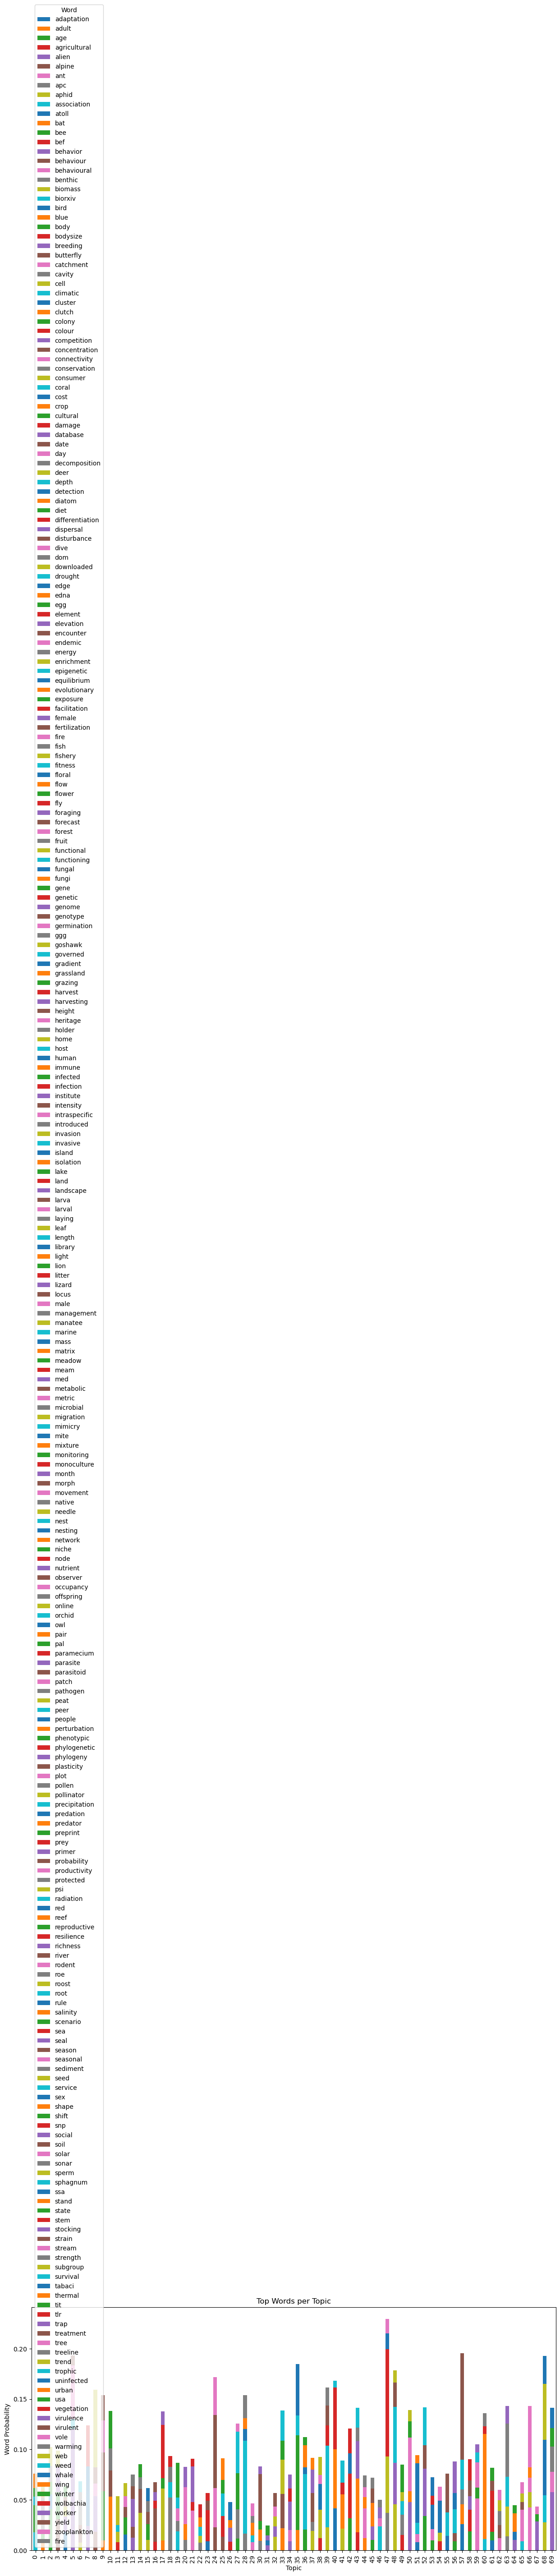

In [23]:
#TOPIC-WORD DISTRIBUTION
#Visualize results
import matplotlib.pyplot as plt
import pandas as pd

top_words_per_topic = []
for t in range(lda_model.num_topics):
    top_words_per_topic.extend([(t,) + x for x in lda_model.show_topic(t, topn = 5)])

pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P']).pivot_table(index='Topic', columns='Word', values='P').plot(kind='bar', stacked=True, figsize=(15, 7))
plt.ylabel('Word Probability')
plt.title('Top Words per Topic')
plt.show()


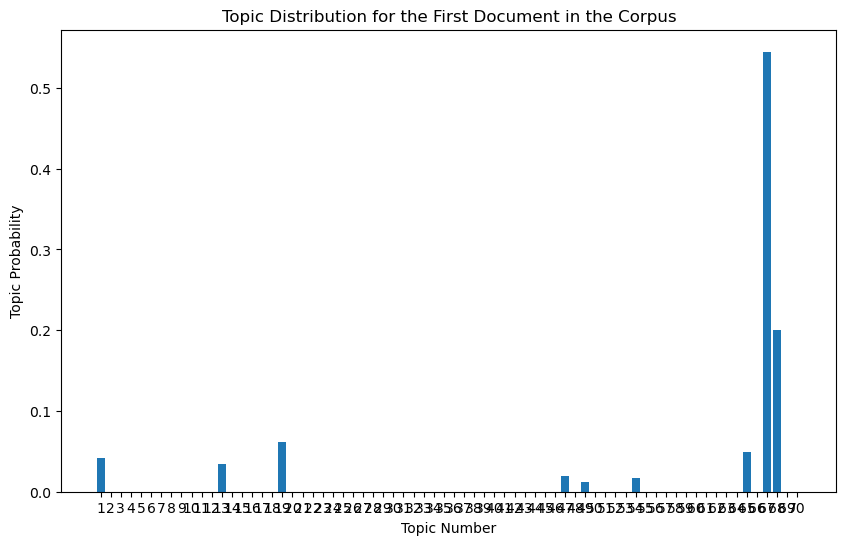

array([[0.04144535, 0.        , 0.        , ..., 0.2001611 , 0.        ,
        0.        ],
       [0.        , 0.01063994, 0.        , ..., 0.09881736, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.03266249, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.15293626, 0.        ,
        0.        ]])

In [24]:
#DOCUMENT-TOPIC DISTRIBUTION


# Initialize a matrix filled with zeros
doc_topic_dist_uniform = np.zeros((len(corpus), lda_model.num_topics))

# Populate the matrix with topic probabilities
for i, doc in enumerate(lda_model[corpus]):
    for topic, prob in doc:
        doc_topic_dist_uniform[i, topic] = prob

# Assuming doc_topic_dist_uniform is correct and contains the topic distributions
plt.figure(figsize=(10, 6))
# Adding 1 to have topics starting from 1 instead of 0 for readability
topics = np.arange(1, lda_model.num_topics + 1)
plt.bar(topics, doc_topic_dist_uniform[0])

plt.xticks(topics)  # Set x-ticks to be the topic numbers
plt.xlabel('Topic Number')
plt.ylabel('Topic Probability')
plt.title('Topic Distribution for the First Document in the Corpus')
plt.show()

doc_topic_dist_uniform

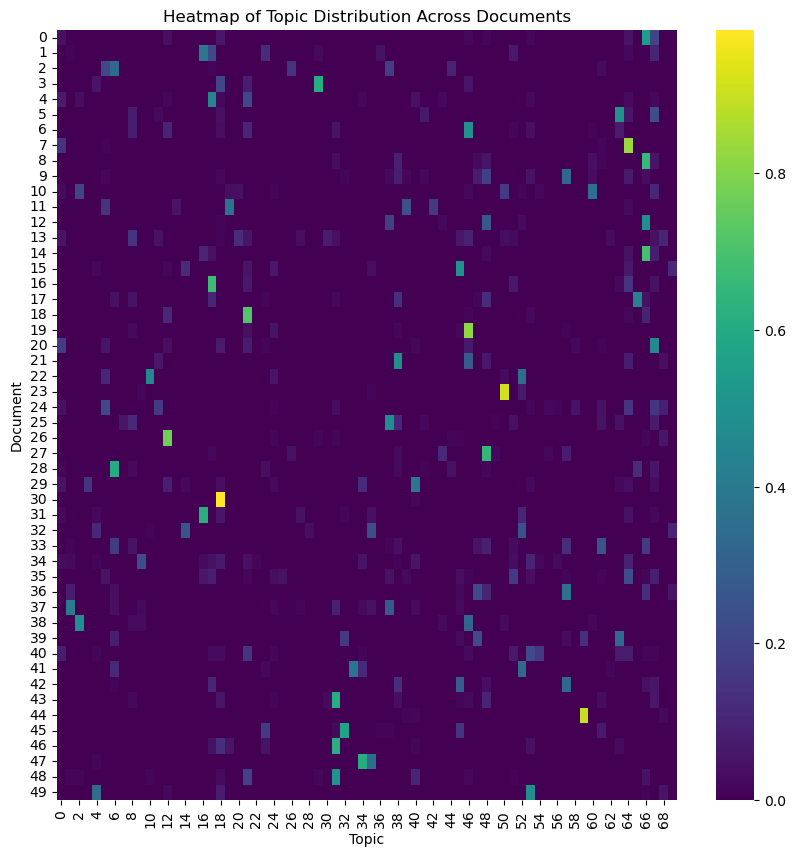

In [25]:


# Creating a DataFrame for the first N documents
doc_topic_dist_uniform = pd.DataFrame(doc_topic_dist_uniform[:50])

# Plotting the heatmap
plt.figure(figsize=(10,10))
sns.heatmap(doc_topic_dist_uniform, cmap='viridis')
plt.xlabel('Topic')
plt.ylabel('Document')
plt.title('Heatmap of Topic Distribution Across Documents')
plt.show()


In [14]:
#most representative sentence for each topic# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet,
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)],
                                            axis=0)

# Reset Index
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

NameError: name 'df_topic_sents_keywords' is not defined